<a href="https://colab.research.google.com/github/deepakk7195/IISC_CDS_DS/blob/Neural_Networks/MiniProject_1_Image_Classification_MLP_Team12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Input, Flatten, Dropout, BatchNormalization
from functools import partial

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
# YOUR CODE HERE
!sudo pip install Pillow

In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 9.4.0


In [ ]:
# load and show an image with Pillow
from PIL import Image, ImageShow
# load the image
image = Image.open('./FullIJCNN2013/00001.ppm')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
ImageShow._viewers.append(ImageShow.WindowsViewer())
image.show()

PPM
RGB
(1360, 800)


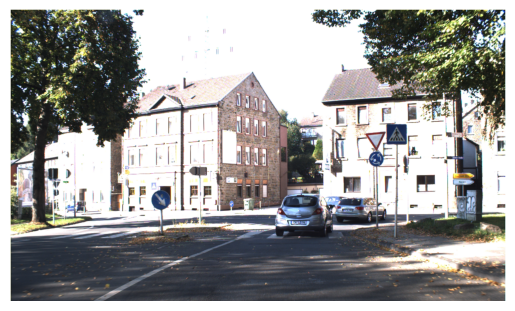

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

uint8
(800, 1360, 3)


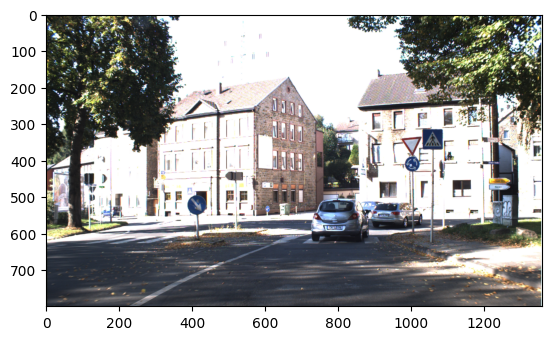

In [ ]:
# load image as pixel array
from matplotlib import image
data = image.imread('./FullIJCNN2013/00001.ppm')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.imshow(data)
plt.show()

In [ ]:
# load image and convert to and from NumPy array
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('./FullIJCNN2013/00000.ppm')
# convert image to numpy array
data = asarray(image)
# summarize shape
print(data.shape)
# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(800, 1360, 3)
None
RGB
(1360, 800)


In [ ]:
from os import listdir
from matplotlib import image

loaded_images = list()
for filename in listdir('./FullIJCNN2013'):
	# load image
	if filename.endswith('.ppm'):
		img_data = image.imread('./FullIJCNN2013/' + filename)
		loaded_images.append(img_data)
		# store loaded image
		print('\t> loaded %s %s' % (filename, img_data.shape))

	> loaded 00255.ppm (800, 1360, 3)
	> loaded 00817.ppm (800, 1360, 3)
	> loaded 00560.ppm (800, 1360, 3)
	> loaded 00848.ppm (800, 1360, 3)
	> loaded 00059.ppm (800, 1360, 3)
	> loaded 00694.ppm (800, 1360, 3)
	> loaded 00829.ppm (800, 1360, 3)
	> loaded 00583.ppm (800, 1360, 3)
	> loaded 00536.ppm (800, 1360, 3)
	> loaded 00811.ppm (800, 1360, 3)
	> loaded 00099.ppm (800, 1360, 3)
	> loaded 00272.ppm (800, 1360, 3)
	> loaded 00105.ppm (800, 1360, 3)
	> loaded 00239.ppm (800, 1360, 3)
	> loaded 00509.ppm (800, 1360, 3)
	> loaded 00591.ppm (800, 1360, 3)
	> loaded 00839.ppm (800, 1360, 3)
	> loaded 00013.ppm (800, 1360, 3)
	> loaded 00899.ppm (800, 1360, 3)
	> loaded 00603.ppm (800, 1360, 3)
	> loaded 00361.ppm (800, 1360, 3)
	> loaded 00525.ppm (800, 1360, 3)
	> loaded 00333.ppm (800, 1360, 3)
	> loaded 00542.ppm (800, 1360, 3)
	> loaded 00770.ppm (800, 1360, 3)
	> loaded 00209.ppm (800, 1360, 3)
	> loaded 00270.ppm (800, 1360, 3)
	> loaded 00677.ppm (800, 1360, 3)
	> loaded 00308.ppm 

In [ ]:
type(img_data)

numpy.ndarray

In [ ]:
len(loaded_images)

900

In [ ]:
loaded_images[0].shape

(800, 1360, 3)

In [ ]:
gtFilePath = "./FullIJCNN2013/gt.txt"
dfLabels = pd.read_csv(gtFilePath, delimiter=';',header=None)
dfLabels.columns = ['ImageFileName', 'X1', 'Y1', 'X2', 'Y2', 'ImageLabel']

In [ ]:
dfLabels

,ImageFileName,X1,Y1,X2,Y2,ImageLabel
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
1208,00896.ppm,808,412,846,450,15
1209,00897.ppm,804,526,828,550,42
1210,00898.ppm,323,504,355,536,4
1211,00898.ppm,817,510,849,542,4


In [ ]:
"""
create folder Images
Read each row in gt.txt
Get the clipped image and name it Image-seq.png where seq is the sequence number
Resize it to 30x30
save it in Images folder
Convert it to Numpy array using imread
Convert it to 1-D array
"""

'\ncreate folder Images\nRead each row in gt.txt\nGet the clipped image and name it Image-seq.png where seq is the sequence number\nResize it to 30x30\nsave it in Images folder\nConvert it to Numpy array using imread\nConvert it to 1-D array\n'

In [ ]:
# Create new directory for Traffic Sign images
new_directory = './TrafficSigns'

# Create the new directory
try:
    os.makedirs(new_directory)
    print(f"Directory '{new_directory}' created successfully")
except FileExistsError:
    print(f"Directory '{new_directory}' already exists")

Directory './TrafficSigns' created successfully


In [ ]:
from PIL import Image, ImageShow

# List all files in the directory
files = os.listdir(new_directory)

# Delete existing files in TrafficSigns folder
for file in files:
    file_path = os.path.join(new_directory, file)
    if os.path.isfile(file_path):
        os.remove(file_path)
        #print(f"Deleted file: {file_path}")

trafficSignArrayList = list()
trafficSignImageList = list()
labelsList = list()

loopIndex = 1
for row in dfLabels.itertuples(index=True):
    # print(f"Image File Name: {row.ImageFileName}")
    # print(f"X1: {row.X1}, Y1: {row.Y1}, X2: {row.X2}, Y2: {row.Y2}")
    # print(f"ImageLabel: {row.ImageLabel}")


    # load the image
    imageFilePath = './FullIJCNN2013/' + row.ImageFileName
    # print(imageFilePath)
    image = Image.open(imageFilePath)
    # summarize some details about the image
    # print(image.format)
    # print(image.mode)
    # print(image.size)
    # plt.imshow(image)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()

    # Clip the image within the box defined by (X1,Y1) and (X2, Y2)
    croppedImage = image.crop((row.X1, row.Y1, row.X2, row.Y2))
    # plt.imshow(croppedImage)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()

    # Resize the image to 30x30
    resizedImage = croppedImage.resize((30, 30))

    # plt.imshow(resizedImage)
    # plt.axis('off')  # Turn off axis numbers and ticks
    # plt.show()

    # Save the traffic sign into folder
    trafficSignFileName = f"TrafficSign-{loopIndex}.ppm"
    trafficSignFilePath = os.path.join(new_directory, trafficSignFileName)
    resizedImage.save(trafficSignFilePath)
    trafficSignImageList.append(resizedImage)

    #Convert to NumPy array and flatten to 1-D array

    trafficSignArray = np.array(resizedImage)
    trafficSignArray = trafficSignArray.flatten()

    trafficSignArrayList.append(trafficSignArray)
    labelsList.append(row.ImageLabel)

    loopIndex += 1
    # if loopIndex == 10:
    #     break

In [ ]:
len(trafficSignArrayList)

1213

In [ ]:
trafficSignArrayList[0].shape

(2700,)

In [ ]:
len(labelsList)

1213

In [ ]:
numTrafficSignClasses = len(set(labelsList))
print(numTrafficSignClasses)

43


In [ ]:
set(labelsList)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42}

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

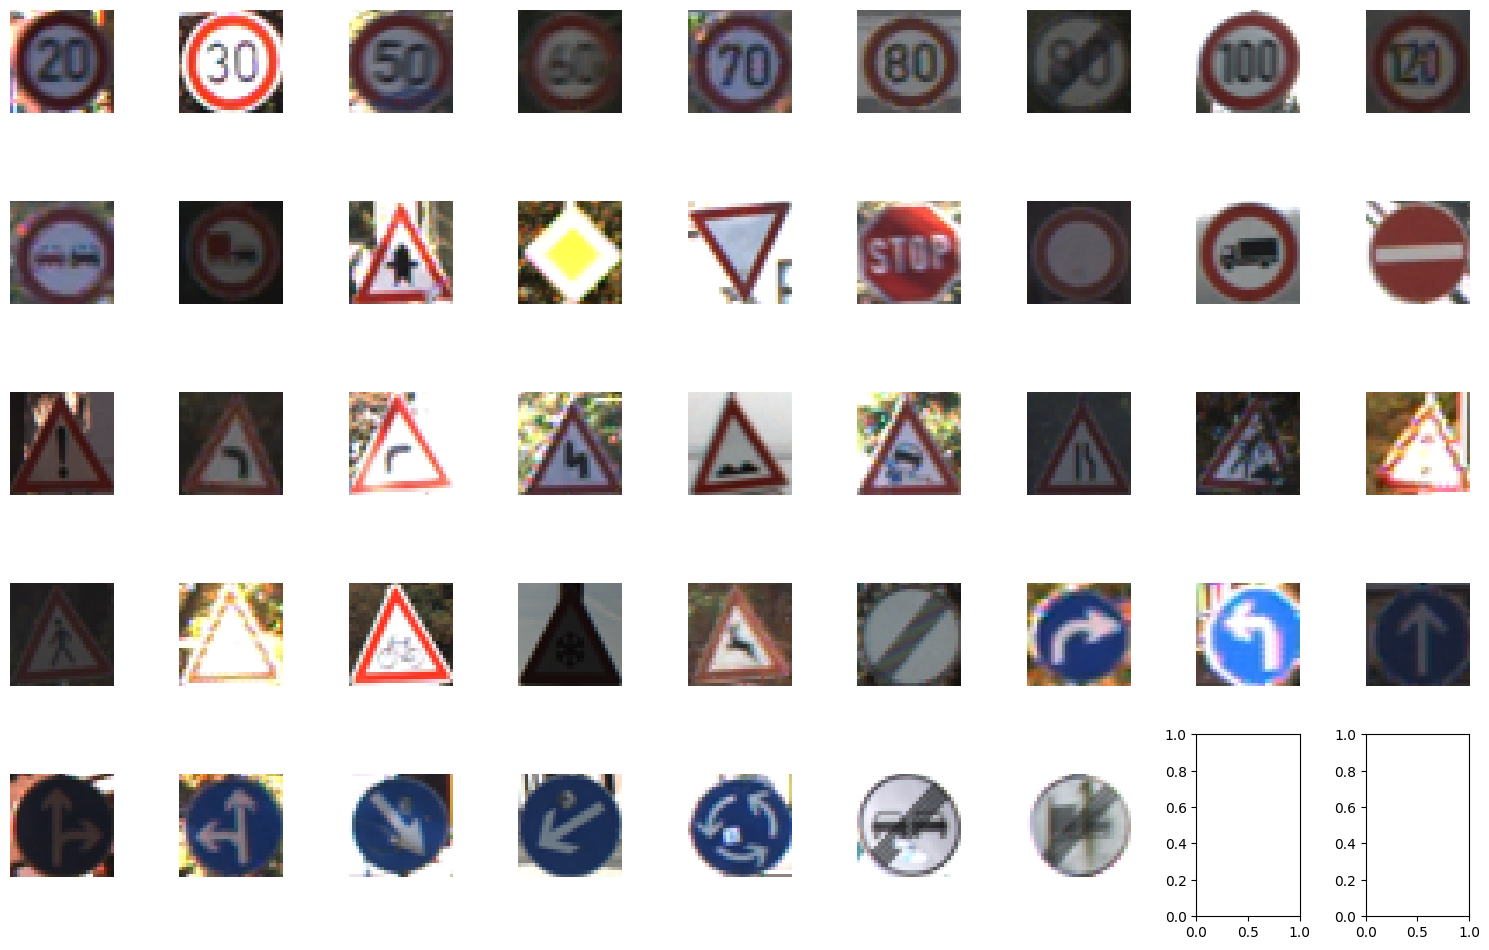

In [ ]:
# YOUR CODE HERE
# Create sample image list
sampleImageList = list()

for classLabel in set(labelsList):
    sampleImagePosition = labelsList.index(classLabel)
    sampleImageList.append(trafficSignImageList[sampleImagePosition])


# Define the number of rows and columns
nrows = 5
ncols = 9

# Create a figure
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

# Iterate over images and their corresponding subplot
for i, image in enumerate(sampleImageList):
    # Calculate the position in the grid
    row = i // ncols
    col = i % ncols

    # Display the image in the subplot
    axs[row, col].imshow(image)
    axs[row, col].axis('off')  # Hide the axis

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


#### Plot the distribution of Classes

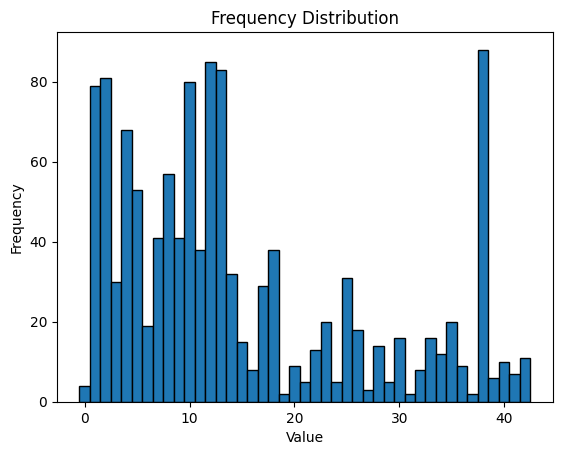

In [ ]:
# YOUR CODE HERE

# Create a histogram
plt.hist(labelsList, bins=np.arange(min(labelsList)-0.5, max(labelsList)+1.5, 1), edgecolor='black')

# Add title and labels
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# YOUR CODE HERE
trafficSignArrayListNormalized = preprocessing.normalize(trafficSignArrayList)


In [ ]:
trafficSignArrayListNormalized

array([[0.01128696, 0.0128154 , 0.00999366, ..., 0.02539565, 0.02280906,
        0.02233877],
       [0.03292978, 0.03292978, 0.03292978, ..., 0.01962873, 0.01652946,
        0.01588378],
       [0.03496209, 0.03496209, 0.03496209, ..., 0.02879231, 0.02755836,
        0.02467912],
       ...,
       [0.04298585, 0.06232949, 0.07583933, ..., 0.00859717, 0.01074646,
        0.0132028 ],
       [0.01285936, 0.01157342, 0.01221639, ..., 0.01478826, 0.01285936,
        0.01350232],
       [0.01709843, 0.01424869, 0.0146558 , ..., 0.01424869, 0.01139895,
        0.01180606]])

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
# YOUR CODE HERE
# Train an MLP classifier
from sklearn.metrics import accuracy_score

X = trafficSignArrayListNormalized
y = labelsList

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X1_train= X_train
X1_test = X_test
Y1_train = y_train
Y1_test = y_test

In [ ]:
modelMLP = MLPClassifier(activation='relu',
                      max_iter=10000,
                      hidden_layer_sizes=(4)
                      )
modelMLP.fit(X_train, y_train)
y_pred_clfMLP = modelMLP.predict(X_test)
accuracy_score(y_test, y_pred_clfMLP)

0.720164609053498

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
#paramsMLP = {'hidden_layer_sizes':[(100,), (200,), (100, 100), (100, 50), (100, 100, 50)], 'activation':('relu', 'tanh'), 'solver':('adam', 'sgd'), 'shuffle':(True, False)}
paramsMLP = {'activation':('relu', 'tanh'), 'solver':('adam', 'sgd'), 'shuffle':(True, False)}
modelMLPGrid = MLPClassifier()
clfMLPGrid = GridSearchCV(modelMLPGrid, paramsMLP)
clfMLPGrid.fit(X_train,y_train)
y_pred_clfMLPGrid = clfMLPGrid.predict(X_test)
accuracy_score(y_test, y_pred_clfMLPGrid)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochast

0.897119341563786

In [ ]:
# YOUR CODE HERE
accuracy_score(y_test, y_pred_clfMLPGrid)

0.897119341563786

In [ ]:
# Print the best parameters found by grid search
best_params = clfMLPGrid.best_params_
print('Best parameters found:\n', best_params)

Best parameters found:
 {'activation': 'tanh', 'shuffle': False, 'solver': 'adam'}


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_clfMLPGrid)

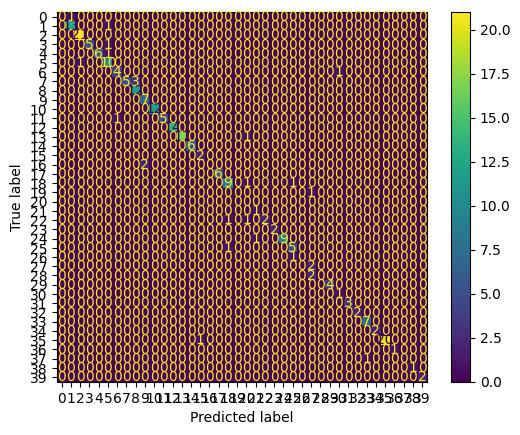

<Figure size 3000x3000 with 0 Axes>

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfMLPGrid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(40))
disp.plot()
plt.figure(figsize=(30, 30))
plt.tight_layout()
plt.show()

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Logistic Regression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.4567901234567901

In [ ]:
# Decision Tree

basic_dt = DecisionTreeClassifier(random_state=42)
basic_dt.fit(X_train, y_train)
y_pred_dt = basic_dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6172839506172839

In [ ]:
# Random Forest

basic_rf = RandomForestClassifier(random_state=42)
basic_rf.fit(X_train, y_train)
y_pred_rf = basic_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8683127572016461

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
len(y_test)

243

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 2700)
(243, 2700)
(970,)
(243,)


In [ ]:
X1_train = X1_train.reshape(-1, 2700)
X1_test = X1_test.reshape(-1, 2700)

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(2700,1)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(numTrafficSignClasses, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 300)               810300    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 43)                12943     
                                                                 
Total params: 913543 (3.48 MB)
Trainable params: 913543 (3.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
metrics=["accuracy"])


In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
history_original = model.fit(X1_train, y_train, epochs=50, validation_data=(X1_test, y_test))

Epoch 1/50
31/31 [==============================] - 2s 11ms/step - loss: 3.4437 - accuracy: 0.0948 - val_loss: 3.3225 - val_accuracy: 0.0494
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 3.1778 - accuracy: 0.1835 - val_loss: 3.0506 - val_accuracy: 0.1399
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 2.8405 - accuracy: 0.2608 - val_loss: 2.8000 - val_accuracy: 0.1893
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 2.4716 - accuracy: 0.3371 - val_loss: 2.4888 - val_accuracy: 0.2675
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 2.1886 - accuracy: 0.4082 - val_loss: 2.1569 - val_accuracy: 0.3498
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 1.9666 - accuracy: 0.4216 - val_loss: 2.0742 - val_accuracy: 0.3498
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 1.7811 - accuracy: 0.4804 - val_loss: 1.9769 - val_accuracy: 0.3128
Epoch 8/50
31/31 [=

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.7613


[0.782846987247467, 0.7613168954849243]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(3))

1/1 [==============================] - 0s 74ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.037 0.443 0.001 0.    0.    0.    0.049 0.012 0.    0.
  0.    0.086 0.    0.347 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.001 0.001 0.    0.    0.    0.    0.    0.018
  0.002 0.    0.    0.    0.    0.    0.   ]]


In [ ]:
print(Y1_test[0])
print(Y1_test[1])
print(Y1_test[2])

13
17
15


In [ ]:
# YOUR CODE HERE

#### Experiment using Dropout, Regularization and Batch Normalization

# Batch Normalization

In [ ]:
# create model with Batch Normalization
modelBN = Sequential([
                    Flatten(input_shape=[2700,1]),
                    BatchNormalization(),
                    Dense(300, activation="relu", kernel_initializer="he_normal"),
                    BatchNormalization(),
                    Dense(300, activation="relu", kernel_initializer="he_normal"),
                    BatchNormalization(),
                    Dense(numTrafficSignClasses, activation="softmax")])


In [ ]:
modelBN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2700)              0         
                                                                 
 batch_normalization (Batch  (None, 2700)              10800     
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               810300    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_2 (Bat  (None, 300)              

In [ ]:
#Step 2 - Compile the model
modelBN.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# Step 3 - Fit and Evaluate the model
modelBN.fit(X1_train, y_train, epochs=50, validation_data=(X1_test, y_test))

Epoch 1/50
31/31 [==============================] - 2s 11ms/step - loss: 1.8782 - accuracy: 0.5433 - val_loss: 3.5999 - val_accuracy: 0.0576
Epoch 2/50
31/31 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.8062 - val_loss: 3.4852 - val_accuracy: 0.0576
Epoch 3/50
31/31 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.8691 - val_loss: 3.3641 - val_accuracy: 0.0576
Epoch 4/50
31/31 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.9113 - val_loss: 3.2475 - val_accuracy: 0.0988
Epoch 5/50
31/31 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9351 - val_loss: 3.2272 - val_accuracy: 0.0576
Epoch 6/50
31/31 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.9557 - val_loss: 3.1782 - val_accuracy: 0.0658
Epoch 7/50
31/31 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.9567 - val_loss: 2.9833 - val_accuracy: 0.0700
Epoch 8/50
31/31 [=

In [ ]:
#Evaluate Model
modelBN.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.9012


[0.5025227069854736, 0.9012345671653748]

#Regularization

In [ ]:
layer = Dense(100, activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

# creating regularized dense layer for model
RegularizedDense = partial(keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

# defining model with regularization
modelReg = Sequential([
    Flatten(input_shape=[2700,1]),
    RegularizedDense(300),
    RegularizedDense(300),
    RegularizedDense(numTrafficSignClasses,activation="softmax",
                     kernel_initializer="glorot_uniform")
])

In [ ]:
modelReg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2700)              0         
                                                                 
 dense_7 (Dense)             (None, 300)               810300    
                                                                 
 dense_8 (Dense)             (None, 300)               90300     
                                                                 
 dense_9 (Dense)             (None, 43)                12943     
                                                                 
Total params: 913543 (3.48 MB)
Trainable params: 913543 (3.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Compile the model
modelReg.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
 # Step 3 - Fit and Evaluate the model
modelReg.fit(X1_train, y_train, epochs=50, validation_data=(X1_test, y_test))

Epoch 1/50
31/31 [==============================] - 1s 9ms/step - loss: 10.6469 - accuracy: 0.0629 - val_loss: 7.3410 - val_accuracy: 0.1358
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 6.0707 - accuracy: 0.0856 - val_loss: 5.1197 - val_accuracy: 0.1152
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 4.6032 - accuracy: 0.0897 - val_loss: 4.2095 - val_accuracy: 0.0576
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 3.9524 - accuracy: 0.0979 - val_loss: 3.7787 - val_accuracy: 0.1728
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 3.6611 - accuracy: 0.0979 - val_loss: 3.6223 - val_accuracy: 0.0576
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 3.5461 - accuracy: 0.0701 - val_loss: 3.5470 - val_accuracy: 0.1852
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 3.5045 - accuracy: 0.0845 - val_loss: 3.5131 - val_accuracy: 0.0741
Epoch 8/50
31/31 [=

In [ ]:
##Evaluate Model
modelReg.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 3.4287 - accuracy: 0.0576


[3.4287123680114746, 0.05761316791176796]

#Dropout

In [ ]:
modelDrop = Sequential([
                    Flatten(input_shape=[2700,1]),
                    Dropout(rate=0.2),
                    Dense(300, activation="relu", kernel_initializer="he_normal"),
                    Dropout(rate=0.2),
                    Dense(300, activation="relu", kernel_initializer="he_normal"),
                    Dropout(rate=0.2),
                    Dense(numTrafficSignClasses, activation="softmax")
                    ])

In [ ]:
modelDrop.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2700)              0         
                                                                 
 dropout (Dropout)           (None, 2700)              0         
                                                                 
 dense_10 (Dense)            (None, 300)               810300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 43)               

In [ ]:
#Compile the model
modelDrop.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
 # Step 3 - Fit and Evaluate the model
modelDrop.fit(X1_train, y_train, epochs=50, validation_data=(X1_test, y_test))

Epoch 1/50
31/31 [==============================] - 2s 9ms/step - loss: 3.4401 - accuracy: 0.0876 - val_loss: 3.3181 - val_accuracy: 0.0576
Epoch 2/50
31/31 [==============================] - 0s 4ms/step - loss: 3.1697 - accuracy: 0.1753 - val_loss: 3.0445 - val_accuracy: 0.1811
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 2.8902 - accuracy: 0.2691 - val_loss: 2.7587 - val_accuracy: 0.2346
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 2.5958 - accuracy: 0.3103 - val_loss: 2.5462 - val_accuracy: 0.2387
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 2.3487 - accuracy: 0.3701 - val_loss: 2.2872 - val_accuracy: 0.3004
Epoch 6/50
31/31 [==============================] - 0s 4ms/step - loss: 2.0910 - accuracy: 0.4309 - val_loss: 2.0556 - val_accuracy: 0.4074
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 1.9139 - accuracy: 0.4474 - val_loss: 2.1378 - val_accuracy: 0.3251
Epoch 8/50
31/31 [==

In [ ]:
##Evaluate Model
modelDrop.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.8477


[0.48233604431152344, 0.8477365970611572]

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.